# Explorando  e adequando o DataFrame para a análise

In [147]:
#Importando bibliotecas e lendo o csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df_titanic = pd.read_csv('titanic-data-6.csv')


In [148]:
# Primeiras 5 amostras do DataFrame
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [149]:
# Verificando os títulos das colunas
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [150]:
# Verificando se há linhas duplicadas no DataFrame
sum_duplic = sum(df_titanic.duplicated())
print('A quantidade de linhas duplicados é {}.'.format(sum_duplic))

A quantidade de linhas duplicados é 0.


In [151]:
# Dimensões do DataFrame
dimensions = df_titanic.shape
print('O DataFrame possui {} linha(s) e {} colunas.'.format(dimensions[0], dimensions[1]))

O DataFrame possui 891 linha(s) e 12 colunas.


In [152]:
# Verificando se há linhas com valores não definidos e a quantidade de valores não definidos por coluna
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [153]:
# Criando um DataFrame exclusivo de homens
df_titanic_m = df_titanic.query('Sex=="male"')

#Demosntrando que há apenas homens no DataFrame
df_titanic_m.Sex.unique()

array(['male'], dtype=object)

In [154]:
# Criando um DataFrame exclusivo de mulheres
df_titanic_f = df_titanic.query('Sex=="female"')

# Demonstrando que há apenas mulheres nos DataFrame
df_titanic_f.Sex.unique()

array(['female'], dtype=object)

In [155]:
# Substituindo o valores faltantes em "Age" pela idade  média dos homens
mean_age_m = df_titanic_m.Age.mean()
df_titanic_m.Age.fillna(mean_age_m, inplace = True)

# Demonstrando que não há mais valores nulos em "Age" no DataFrame de homens
df_titanic_m.Age.isnull().sum()

0

In [156]:
# Substituindo o valores faltantes em "Age" pela idade  média das Mulheres
mean_age_f = df_titanic_f.Age.mean()
df_titanic_f.Age.fillna(mean_age_f, inplace = True)
# Demonstrando que não há mais valores nulos em "Age" no DataFrame de mulheres
df_titanic_f.Age.isnull().sum()

0

In [157]:
# Criando coluna de faixa etária no data frame de homens
df_titanic_m['Age_Group'] = pd.cut(df_titanic_m.Age, [0, 14, 50, 150], labels=["kids", "adults", "seniors"])

C:\Users\rmuni\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [158]:
# Criando coluna de faixa etáriano DataFrame de mulheres
df_titanic_f['Age_Group'] = pd.cut(df_titanic_f.Age, [0, 14, 50, 150], labels=["kids", "adults", "seniors"])

C:\Users\rmuni\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Dentre os homens deste DataFrame, qual a quantidade, a porcentagem e a idade média dos que sobreviveram?

In [159]:
# somando a quantidade total de homens
sum_m = df_titanic_m.shape[0]

# somando a quantidade de homens que sobreviveram
df_m_surv = df_titanic_m.query('Survived=="1"')
sum_m_surv = df_m_surv.shape[0]

# somando a quantidade de homens que morreram
df_m_died = df_titanic_m.query('Survived=="0"')
sum_m_died = df_m_died.shape[0]

# porcentagem de homens que morreram e sobreviveram
perc_m_surv = round((sum_m_surv/sum_m)*100)
perc_m_died = round((sum_m_died/sum_m)*100)

Homens Sobreviventes: 109 
Homens Mortos: 468


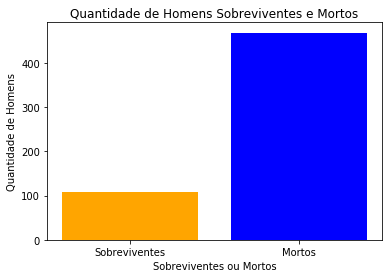

In [160]:
# Criando gráfico de barras do comparativo da quantidade de homens sobreviventes e mortos
plt.bar([1,2],[sum_m_surv,sum_m_died],color = ['orange', 'blue'], tick_label=['Sobreviventes','Mortos'])
plt.title('Quantidade de Homens Sobreviventes e Mortos')
plt.ylabel('Quantidade de Homens')
plt.xlabel('Sobreviventes ou Mortos')
print('Homens Sobreviventes: {} \nHomens Mortos: {}'.format(sum_m_surv,sum_m_died))

Homens Sobreviventes: 19% 
Homens Mortos: 81%


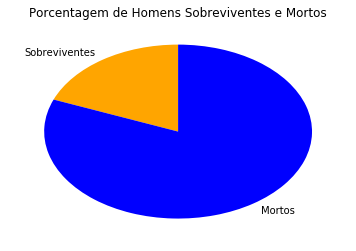

In [161]:
#Criando gráfico de barras da porcentagem de homens sobreviventes e mortos

plt.pie([perc_m_surv, perc_m_died],labels=['Sobreviventes','Mortos'], colors=['orange','blue'], startangle=90)
plt.title('Porcentagem de Homens Sobreviventes e Mortos')
print('Homens Sobreviventes: {}% \nHomens Mortos: {}%'.format(perc_m_surv, perc_m_died))

In [162]:
# Idade média dos homens que sobreviveram
mean_m_surv = round(df_m_surv.Age.mean())
print('A média de idade dos homens sobreviventes é de {} anos.'.format(mean_m_surv))

A média de idade dos homens sobreviventes é de 28 anos.


# Dentre os homens Deste DataFrame, qual faixa etária apresentou a maior  proporção de sobreviventes?

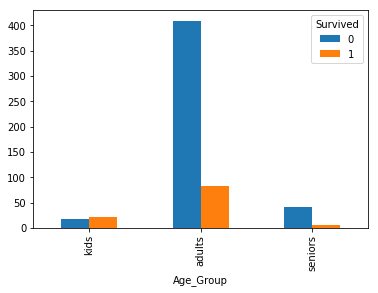

In [163]:
#Comparando a quantidade absoluta de homens sobreviventes por faixa etária
df_titanic_m.groupby(['Age_Group', 'Survived']).size().unstack().plot.bar()

A faixa etária que apresentou a maior proporção de sobreviventes dentre os homens foi a das crianças com 54%.


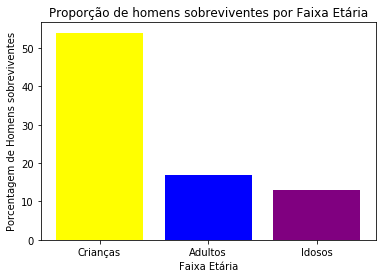

In [164]:
# Criando DataFrames de homens sobreviventes por faixa etária
df_kids_m_surv = df_m_surv.query('Age_Group == "kids"')
df_adults_m_surv = df_m_surv.query('Age_Group == "adults"')
df_seniors_m_surv = df_m_surv.query('Age_Group == "seniors"')

# Verificando a proporcionalidade de homens sobreviventes por faixa etária
perc_kids_m_surv = round((df_kids_m_surv.shape[0]/df_titanic_m.query('Age_Group == "kids"').shape[0])*100)
perc_adults_m_surv = round((df_adults_m_surv.shape[0]/df_titanic_m.query('Age_Group == "adults"').shape[0])*100)
perc_seniors_m_surv = round((df_seniors_m_surv.shape[0]/df_titanic_m.query('Age_Group == "seniors"').shape[0])*100)

# Criando gráfico comparativo de proporcionalidade de sobreviventes homens por faixa etária
plt.bar([1,2,3],[perc_kids_m_surv, perc_adults_m_surv, perc_seniors_m_surv],color = ['yellow', 'blue', 'purple'], tick_label = ['Crianças','Adultos','Idosos'])
plt.title('Proporção de homens sobreviventes por Faixa Etária')
plt.ylabel('Porcentagem de Homens sobreviventes')
plt.xlabel('Faixa Etária')
# Criando condiocional para declarar a faixa etária com a maior proporção de sobreviventes
if perc_kids_m_surv >= perc_adults_m_surv and perc_kids_m_surv >= perc_seniors_m_surv:
    print('A faixa etária que apresentou a maior proporção de sobreviventes dentre os homens foi a das crianças com {}%.'.format(perc_kids_m_surv))
elif perc_adults_m_surv >= perc_kids_m_surv and perc_adults_m_surv >= perc_seniors_m_surv:
    print('A faixa etária que apresentou a maior proporção de sobreviventes dentre os homens foi a dos adultos com {}%.'.format(perc_adults_m_surv))
else:
    print('A faixa etária que apresentou a maior proporção de sobreviventes dentre os homens foi a dos idosos com {}%.'.format(perc_seniors_m_surv))

# Conclusões parciais sobre a análise do Dataframe de Homens

- Dentre o universo de homens(577) deste DataFrame, foi verificado que 468 homens morreram, enquanto 109 homens sobreviveram, apresentando uma porcentagem de sobrevivência de apenas 19%. A idade média de sobreviventes homens foi de 28 anos, porém a faixa etária que apresentou a maior quantidade, proporcional, de sobreviventes foi a de crianças(de 0 a 13 anos) com taxa de sobrevivência de 54%.

# Dentre as mulheres deste DataFrame, qual a quantidade, a porcentagem e a idade média das que sobreviveram?

In [165]:
# somando a quantidade total de mulheres
sum_f = df_titanic_f.shape[0]

# somando a quantidade de mulheres que sobreviveram
df_f_surv = df_titanic_f.query('Survived=="1"')
sum_f_surv = df_f_surv.shape[0]

# somando a quantidade de mulheres que morreram
df_f_died = df_titanic_f.query('Survived=="0"')
sum_f_died = df_f_died.shape[0]

# porcentagem de mulheres que morreram e sobreviveram
perc_f_surv = round((sum_f_surv/sum_f)*100)
perc_f_died = round((sum_f_died/sum_f)*100)

Mulheres Sobreviventes: 233 
Mulheres Mortas: 81


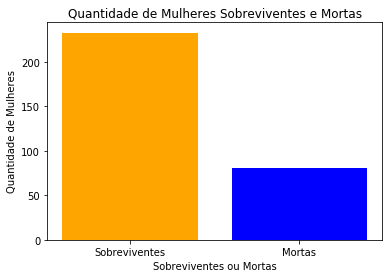

In [166]:
# Criando gráfico de barras do comparativo da quantidade de mulheres sobreviventes e mortas
plt.bar([1,2],[sum_f_surv,sum_f_died],color = ['orange','blue'], tick_label=['Sobreviventes','Mortas'])
plt.title('Quantidade de Mulheres Sobreviventes e Mortas')
plt.ylabel('Quantidade de Mulheres')
plt.xlabel('Sobreviventes ou Mortas')
print('Mulheres Sobreviventes: {} \nMulheres Mortas: {}'.format(sum_f_surv,sum_f_died))

Mulheres Sobreviventes: 74% 
Mulheres Mortas: 26%


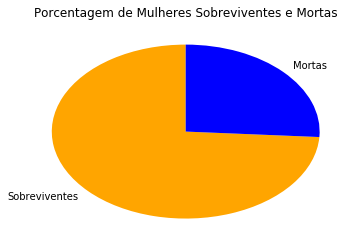

In [167]:
# Criando gráfico de barras de Porcentagem de mulheres sobreviventes e mortas
plt.pie([perc_f_surv, perc_f_died],labels=['Sobreviventes','Mortas'], colors=['orange','blue'], startangle=90)
plt.title('Porcentagem de Mulheres Sobreviventes e Mortas')
print('Mulheres Sobreviventes: {}% \nMulheres Mortas: {}%'.format(perc_f_surv, perc_f_died))

In [168]:
# Idade média das mulheres que sobreviveram
mean_f_surv = round(df_f_surv.Age.mean())
print('A média de idade das mulheres sobreviventes é de {} anos.'.format(mean_f_surv))

A média de idade das mulheres sobreviventes é de 29 anos.


# Dentre as mulheres Deste DataFrame, qual faixa etária apresentou a maior  proporção de sobreviventes?

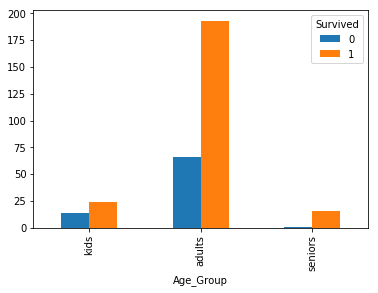

In [174]:
#Comparando a quantidade absoluta de mulheres sobreviventes por faixa etária
df_titanic_f.groupby(['Age_Group', 'Survived']).size().unstack().plot.bar()

A faixa etária que apresentou a maior proporção de sobreviventes dentre as mulheres foi a das idosas com 94%.


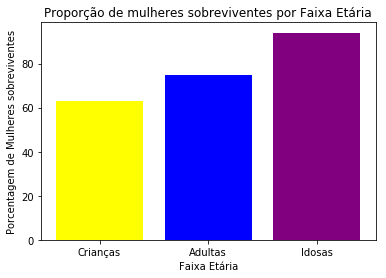

In [170]:
# Criando DataFrames de mulheres sobreviventes por faixa etária
df_kids_f_surv = df_f_surv.query('Age_Group == "kids"')
df_adults_f_surv = df_f_surv.query('Age_Group == "adults"')
df_seniors_f_surv = df_f_surv.query('Age_Group == "seniors"')

# Verificando a proporcionalidade de mulheres sobreviventes por faixa etária
perc_kids_f_surv = round((df_kids_f_surv.shape[0]/df_titanic_f.query('Age_Group == "kids"').shape[0])*100)
perc_adults_f_surv = round((df_adults_f_surv.shape[0]/df_titanic_f.query('Age_Group == "adults"').shape[0])*100)
perc_seniors_f_surv = round((df_seniors_f_surv.shape[0]/df_titanic_f.query('Age_Group == "seniors"').shape[0])*100)

# Criando gráfico comparativo de proporcionalidade de sobreviventes mulheres por faixa etária
plt.bar([1,2,3],[perc_kids_f_surv, perc_adults_f_surv, perc_seniors_f_surv],color = ['yellow','blue','purple'], tick_label = ['Crianças','Adultas','Idosas'])
plt.title('Proporção de mulheres sobreviventes por Faixa Etária')
plt.ylabel('Porcentagem de Mulheres sobreviventes')
plt.xlabel('Faixa Etária')

# Criando condiocional para declarar a faixa etária com a maior proporção de sobreviventes
if perc_kids_f_surv >= perc_adults_f_surv and perc_kids_f_surv >= perc_seniors_f_surv:
    print('A faixa etária que apresentou a maior proporção de sobreviventes dentre as mulheres foi a das crianças com {}%.'.format(perc_kids_f_surv))
elif perc_adults_f_surv >= perc_kids_f_surv and perc_adults_f_surv >= perc_seniors_f_surv:
    print('A faixa etária que apresentou a maior proporção de sobreviventes dentre as mulheres foi a das adultas com {}%.'.format(perc_adults_f_surv))
else:
    print('A faixa etária que apresentou a maior proporção de sobreviventes dentre as mulheres foi a das idosas com {}%.'.format(perc_seniors_f_surv))

# Conclusões parciais sobre a análise do Dataframe de Mulheres

- Dentre o universo de mulheres(314) deste DataFrame, foi verificado que 81 mulheres morreram, enquanto 233 mulheres sobreviveram, apresentando uma alta taxa de sobrevivência de 74%. A idade média de sobreviventes mulheres foi de 29 anos, porém a faixa etária que apresentou a maior quantidade, proporcional, de sobreviventes foi a de idosas(de 50 a 149 anos) com taxa de sobrevivência de 94%.

# Dentre as divisões de classe dos passageiros do Titanic, qual a que apresentou a maior quantidade absoluta de sobreviventes?

In [171]:
# Verificando as opções de classes do navio
classes = df_titanic.Pclass.unique()
print('As classes de passageiros que o Titanic oferecia eram {}ª, {}ª e {}ª.'. format(classes[1],classes[2], classes[0]))

As classes de passageiros que o Titanic oferecia eram 1ª, 2ª e 3ª.


A classe que apresentou o maior número de sobreviventes foi a 1ª classe com 136 pessoas.


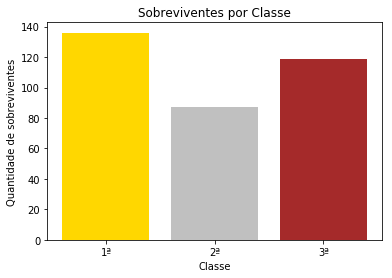

In [172]:
# Criando DataFrame de sobreviventes
df_titanic_surv = df_titanic.query('Survived == "1"')

# Criando Dataframes de classes
df_surv_class_1 = df_titanic_surv.query('Pclass == "1"')
df_surv_class_2 = df_titanic_surv.query('Pclass == "2"')
df_surv_class_3 = df_titanic_surv.query('Pclass == "3"')

# Criando Gráfico de barras de sobreviventes por classe
plt.bar([1,2,3],[df_surv_class_1.shape[0],df_surv_class_2.shape[0],df_surv_class_3.shape[0]],color =['gold','silver','brown'], tick_label=['1ª','2ª','3ª'])
plt.title('Sobreviventes por Classe')
plt.ylabel('Quantidade de sobreviventes')
plt.xlabel('Classe')
# Condicional para declarar qual classe apresentou mais sobreviventes
if df_surv_class_1.shape[0] >= df_surv_class_2.shape[0] and df_surv_class_1.shape[0] >= df_surv_class_3.shape[0]:
    print('A classe que apresentou o maior número de sobreviventes foi a 1ª classe com {} pessoas.'.format(df_surv_class_1.shape[0]))
elif df_surv_class_2.shape[0] >= df_surv_class_1.shape[0] and df_surv_class_2.shape[0] >= df_surv_class_3.shape[0]:
    print('A classe que apresentou o maior número de sobreviventes foi a 2ª classe com {} pessoas.'.format(df_surv_class_2.shape[0]))
else:
    print('A classe que apresentou o maior número de sobreviventes foi a 3ª classe com {} pessoas.'.format(df_surv_class_1.shape[0]))

# Dentre as divisões de classe dos passageiros do Titanic, qual a que apresentou a maior quantidade proporcional de sobreviventes?

A classe que apresentou a maior proporção de sobreviventes dentre os passageiros foi a 1ª Classe com 63%.


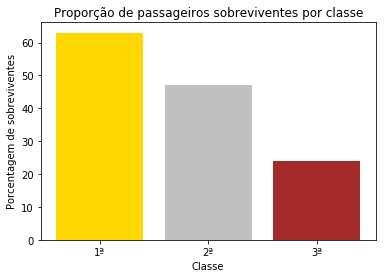

In [173]:
# Verificando a proporcionalidade de passageiros sobreviventes por classe
perc_surv_class_1 = round((df_surv_class_1.shape[0]/df_titanic.query('Pclass == "1"').shape[0])*100)
perc_surv_class_2 = round((df_surv_class_2.shape[0]/df_titanic.query('Pclass == "2"').shape[0])*100)
perc_surv_class_3 = round((df_surv_class_3.shape[0]/df_titanic.query('Pclass == "3"').shape[0])*100)

# Criando gráfico comparativo de proporcionalidade de sobreviventes por classe
plt.bar([1,2,3],[perc_surv_class_1, perc_surv_class_2, perc_surv_class_3],color =['gold','silver','brown'], tick_label = ['1ª','2ª','3ª'])
plt.title('Proporção de passageiros sobreviventes por classe')
plt.ylabel('Porcentagem de sobreviventes')
plt.xlabel('Classe')

# Criando condiocional para declarar a classe com a maior proporção de sobreviventes
if perc_surv_class_1 >= perc_surv_class_2 and perc_surv_class_1 >= perc_surv_class_3:
    print('A classe que apresentou a maior proporção de sobreviventes dentre os passageiros foi a 1ª Classe com {}%.'.format(perc_surv_class_1))
elif perc_surv_class_2 >= perc_surv_class_1 and perc_surv_class_2 >= perc_surv_class_3:
     print('A classe que apresentou a maior proporção de sobreviventes dentre os passageiros foi a 2ª Classe com {}%.'.format(perc_surv_class_2))
else:
     print('A classe que apresentou a maior proporção de sobreviventes dentre os passageiros foi a 3ª Classe com {}%.'.format(perc_surv_class_3))

# Conclusões parciais sobre a análise de sobreviventes por classe

- Dentre o universo de passageiros(891) deste DataFrame, a classe que apresentou maior quantidade absoluta e proporcional de sobreviventes foi a 1ª classe, com 136 e 63%, respectivamente. Apesar de em quantidade absoluta de sobreviventes a 3ª classe ter superado a 2ª classe,  o mesmo não se percebeu na quantidade proporcional, demonstrando que a classe que teve a maior quantidade de vidas perdiadas foi a 3ª classe.

# Conclusões Gerais

Limitações do Dataframe:
 - Este DataFrame não contempla todos os passageiros que embarcaram no Titanic e não contabiliza os tripulantes, portanto esta não e uma análise defitiva e sim de uma amostra dos passageiros que embarcaram no navio.
 - Existem valores faltantes nas colunas 'Age', 'Cabin' e 'Embarked'. A única que gerou  impacto na análise foi a coluna "Age", que teve de ter seus valores faltantes preenchidos pela média de idade de seu respectivo gênero, para que a análise pudesse ser efetuada.

Perguntas e Respostas.

Dentre os homens deste DataFrame, qual a quantidade, a porcentagem e a idade média dos que sobreviveram?

Dentre os homens deste DataFrame, qual faixa etária apresentou a maior proporção de sobreviventes?

- Dentre o universo de homens(577) deste DataFrame, foi verificado que 468 homens morreram, enquanto que apenas 109 homens sobreviveram, apresentando uma porcentagem de sobrevivência de 19%. A idade média de sobreviventes homens foi de 28 anos, porém a faixa etária que apresentou a maior quantidade, proporcional, de sobreviventes foi a de crianças(de 0 a 13 anos) com taxa de sobrevivência de 54%.

Dentre as mulheres deste DataFrame, qual a quantidade, a porcentagem e a idade média dos que sobreviveram?

Dentre as mulheres deste DataFrame, qual faixa etária apresentou a maior proporção de sobreviventes?

- Dentre o universo de mulheres(314) deste DataFrame, foi verificado que 81 mulheres morreram, enquanto que 233 mulheres sobreviveram, apresentando uma porcentagem de sobrevivência de 74%. A idade média de sobreviventes mulheres foi de 29 anos, porém a faixa etária que apresentou a maior quantidade, proporcional, de sobreviventes foi a de idosas(de 50 a 149 anos) com taxa de sobrevivência de 94%.

Dentre as divisões de classe dos passageiros do Titanic, qual a que apresentou a maior quantidade absoluta de sobreviventes?

Dentre as divisões de classe dos passageiros do Titanic, qual a que apresentou a maior quantidade proporcional de sobreviventes?
 
 - Dentre o universo de passageiros(891) deste DataFrame, a classe que apresentou maior quantidade absoluta e proporcional de sobreviventes foi a 1ª classe, com 136 e 63%, respectivamente. Apesar de em quantidade absoluta de sobreviventes a 3ª classe ter superado a 2ª classe,  o mesmo não se percebeu na quantidade proporcional, demonstrando que a classe que teve a maior quantidade de vidas perdiadas foi a 3ª classe.
 
Diante da análise exposta, foi possível concluir que: 
 - entre as classes, houve prioridade de evacuaçao da 1ª classe, tendo a 3ª classe a mior quantidade de vidas perdidas;
 - entre homens e mulheres, houve prioridade de evacuação de mulheres, demonstrando uma proporcionalidade muito maior de sobreviventes mulheres;
 - dentre os homens, houve prioridade de evacuação dos meninos;
 - dentre as mulheres, houve prioridade de evacuação das idosas;